## 01-results-data-prep.ipynb

Creates the **Chapter 4.2 Participant Profile** tables and bar charts from the raw survey export (`data.csv`).

**What it does:**
- Loads the Google Forms dataset and maps long question headers to short keys.
- Generates **frequency tables (n, %)** and **bar charts** for:
  - demographics (status, gender, age, semester)
  - education background (level of study, field/department)
  - experience & AI background (work experience, AI awareness, AI exposure)

**Output:** Descriptive tables and plots used in the participant profile/results section.


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Display tables
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_colwidth', 200)

df = pd.read_csv("data.csv") #reads data from the same repository
df.head()

,Column 1,Have you read the information above and do you agree to participate in this survey?,Which of the following best describes you?,Which semester are you currently in?,What is your age group?,What is your gender?,Which of the following best describes your study programme or department?,Which best describes your current or most recently completed level of study?,Do you have any previous work or internship experience?,"Before this survey, were you aware that some companies use AI-based systems in recruitment and selection (e.g., automated CV screening, AI ranking of candidates, AI video interview analysis)?",...,"Please indicate how strongly you agree or disagree with the following statements about AI-based recruitment systems.\n(AI-based recruitment includes tools such as automated CV screening, AI ranking of candidates, AI video interview analysis, etc.) [AI-based recruitment systems feel like a “black box” to me. (reverse-coded)]","Please indicate how strongly you agree or disagree with the following statements about AI-based recruitment systems.\n(AI-based recruitment includes tools such as automated CV screening, AI ranking of candidates, AI video interview analysis, etc.) [I trust AI systems to evaluate candidates fairly.]","Please indicate how strongly you agree or disagree with the following statements about AI-based recruitment systems.\n(AI-based recruitment includes tools such as automated CV screening, AI ranking of candidates, AI video interview analysis, etc.) [I worry that AI recruitment systems might discriminate against certain groups of applicants. (reverse-coded)]","Please indicate how strongly you agree or disagree with the following statements about AI-based recruitment systems.\n(AI-based recruitment includes tools such as automated CV screening, AI ranking of candidates, AI video interview analysis, etc.) [I would be uncomfortable if an AI system made the final decision about whether I get an interview. (reverse-coded)]","Please indicate how strongly you agree or disagree with the following statements about AI-based recruitment systems.\n(AI-based recruitment includes tools such as automated CV screening, AI ranking of candidates, AI video interview analysis, etc.) [Overall, I feel positive about the use of AI in recruitment.]","Please indicate how strongly you agree or disagree with the following statements about AI-based recruitment systems.\n(AI-based recruitment includes tools such as automated CV screening, AI ranking of candidates, AI video interview analysis, etc.) [I would apply to a company that uses AI in its recruitment process.]","Please indicate how strongly you agree or disagree with the following statements about AI-based recruitment systems.\n(AI-based recruitment includes tools such as automated CV screening, AI ranking of candidates, AI video interview analysis, etc.) [Knowing that a company uses AI to screen applications would discourage me from applying. (reverse-coded)]","If a company clearly states that it uses AI tools as part of its recruitment process, how likely would you be to apply for a job or internship there?","If you had two similar job opportunities, and the only difference was the recruitment process, which would you prefer?","For the initial screening of applications (deciding who is invited to the first interview), which option would you feel most comfortable with?"
0,1/8/2026 2:33:06,"Yes, I agree to participate.",I am currently enrolled as a university student,1–2,20–22,Male,Law,Bachelor,"Yes, part-time work",Yes,...,Disagree,Disagree,Strongly agree,Strongly disagree,Strongly agree,Neither agree nor disagree,Agree,4,Company B: Recruitment handled by a combination of AI tools and human recruiters,AI tools fully decide which candidates are shortlisted
1,1/8/2026 2:36:28,"Yes, I agree to participate.",I am currently enrolled as a university student,3–4,26–30,Male,Business / Management / Economics,Bachelor,"Yes, full-time work",Yes,...,Strongly agree,Strongly agree,A

In [10]:
# Following is the Python dictionary mapping for the columns
COL = {
    'status': 'Which of the following best describes you?',
    'semester': 'Which semester are you currently in?',
    'age': 'What is your age group?',
    'gender': 'What is your gender?',
    'field': 'Which of the following best describes your study programme or department?',
    'level': 'Which best describes your current or most recently completed level of study?',
    'workexp': 'Do you have any previous work or internship experience?',
    'aware': 'Before this survey, were you aware that some companies use AI-based systems in recruitment and selection (e.g., automated CV screening, AI ranking of candidates, AI video interview analysis)?',
    'applied_ai': 'Have you ever applied for a position (job, internship, trainee, etc.) where AI was used or likely used in the recruitment process?',
    'understand': 'How well do you feel you understand, in general, how AI-based recruitment systems work?',
}



In [11]:
# defining function for the frequency table
def freq_table(data: pd.DataFrame, col: str, dropna: bool = True) -> pd.DataFrame:
    """Return a frequency table."""
    s = data[col]
    if dropna:
        s = s.dropna()
    counts = s.value_counts(dropna=False)
    perc = (counts / counts.sum() * 100).round(1)
    out = pd.DataFrame({
        'Category': counts.index.astype(str),
        'n': counts.values,
        '%': perc.values
    })
    return out

# defining function for the bar chart
def bar_chart(data: pd.DataFrame, col: str, title: str, dropna: bool = True, rotation: int = 30):
    """Simple bar chart."""
    s = data[col]
    if dropna:
        s = s.dropna()
    counts = s.value_counts()

    plt.figure(figsize=(10, 5))
    plt.bar(counts.index.astype(str), counts.values)
    plt.title(title)
    plt.ylabel('Count')
    plt.xticks(rotation=rotation, ha='right')
    plt.tight_layout()
    plt.show()

# The following function displays the table and chart for mapped column key
def show_profile(data: pd.DataFrame, key: str, title: str, dropna: bool = True, rotation: int = 30):
    """Display frequency table and bar chart for a mapped column key."""
    col = COL[key]
    t = freq_table(data, col, dropna=dropna)
    display(t)
    bar_chart(data, col, f"{title} (N={len(data)})", dropna=dropna, rotation=rotation)
    return t


## Demographics

,Category,n,%
0,I am currently enrolled as a university student,68,81.0
1,I have already graduated from university (within the last 3 years),16,19.0


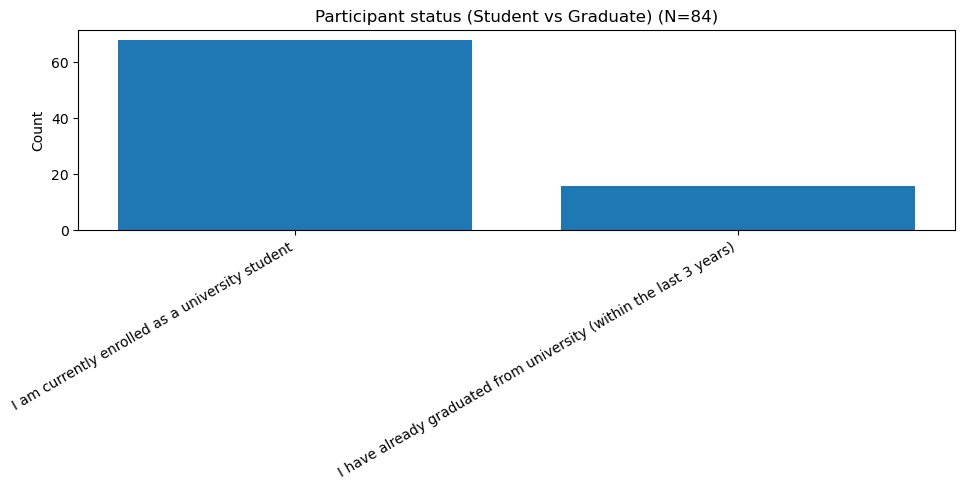

,Category,n,%
0,Male,45,53.6
1,Female,39,46.4


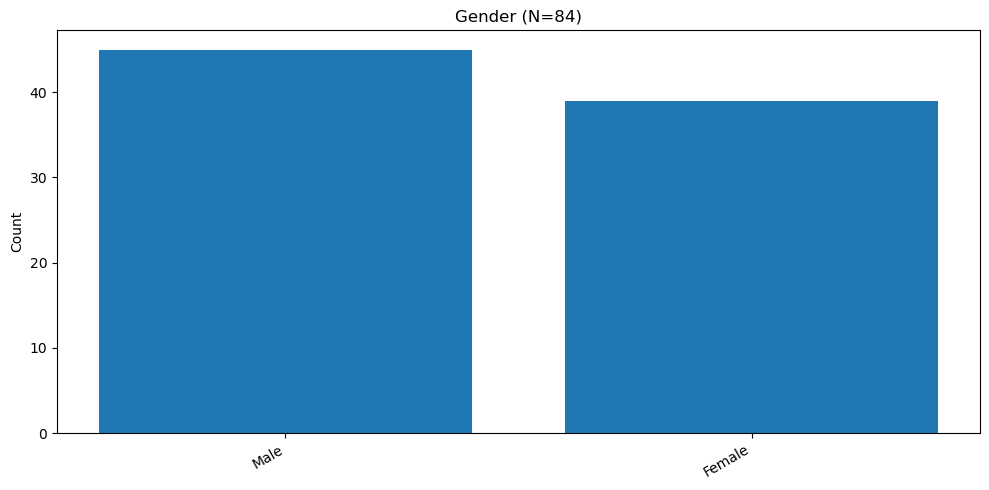

,Category,n,%
0,23–25,34,40.5
1,20–22,23,27.4
2,26–30,19,22.6
3,Over 30,6,7.1
4,Under 20,2,2.4


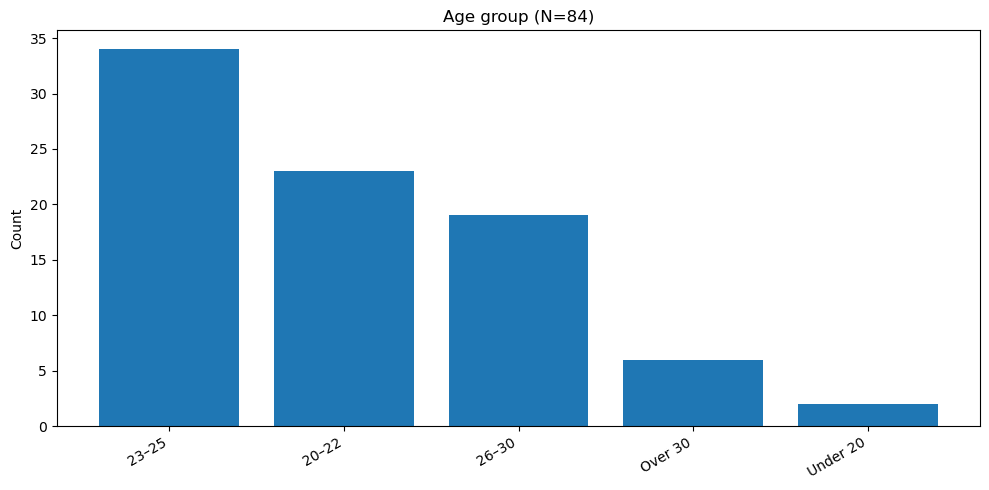

In [12]:
t_status = show_profile(df, 'status', 'Participant status (Student vs Graduate)')
t_gender = show_profile(df, 'gender', 'Gender')
t_age = show_profile(df, 'age', 'Age group')

,Category,n,%
0,5–6,34,50.0
1,3–4,21,30.9
2,7–8,9,13.2
3,1–2,4,5.9


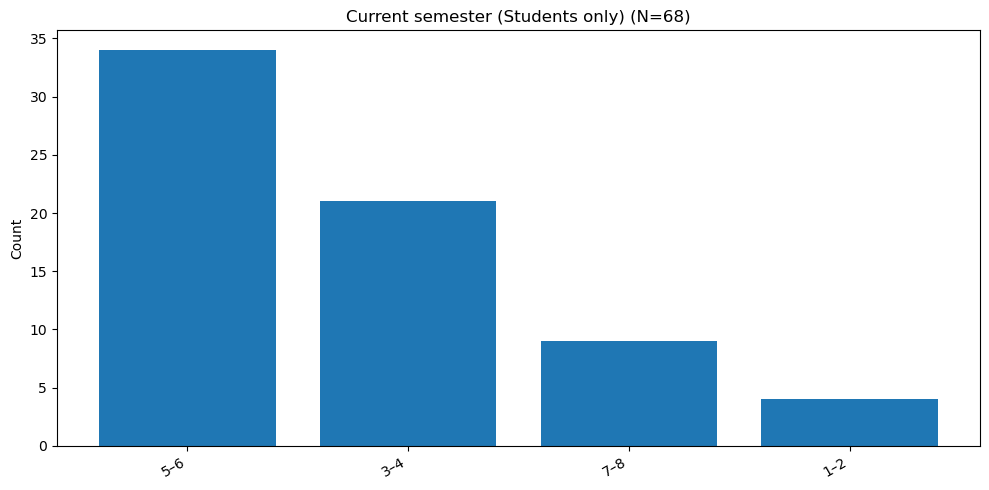

In [13]:
# Semester is only meaningful for CURRENT students at universities (graduates cannot be counted for this)
students_only = df[df[COL['status']] == 'I am currently enrolled as a university student'].copy()
t_semester = show_profile(students_only, 'semester', 'Current semester (Students only)', dropna=True)

## Educational background

,Category,n,%
0,Bachelor,65,77.4
1,Master,11,13.1
2,"Other (e.g., diploma, certificate)",8,9.5


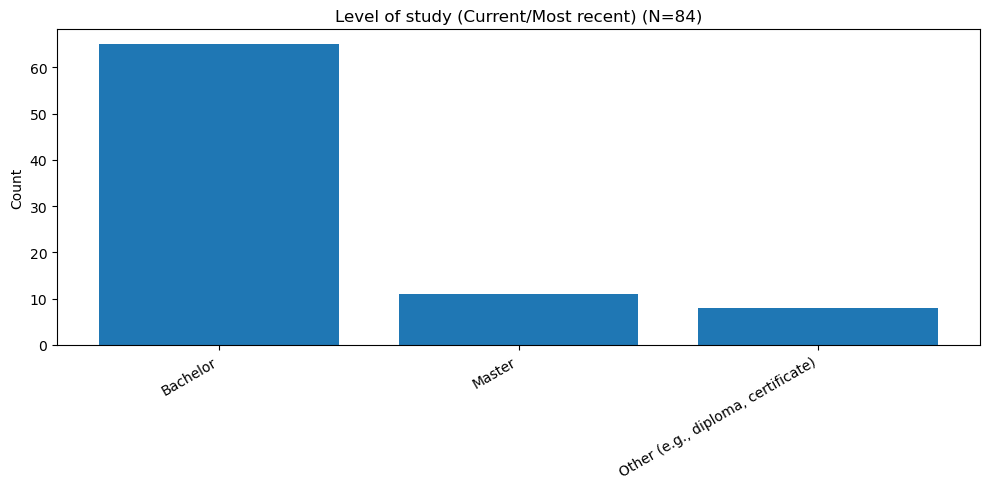

,Category,n,%
0,Business / Management / Economics,29,34.5
1,Computer Science / Information Technology,27,32.1
2,Engineering (non-IT),9,10.7
3,Health / Medical / Life Sciences,5,6.0
4,Law,4,4.8
5,Other,3,3.6
6,"Social Sciences (e.g., Psychology, Sociology, Political Science)",3,3.6
7,"Humanities (e.g., Literature, History, Philosophy)",3,3.6
8,"Natural Sciences (e.g., Physics, Chemistry, Biology)",1,1.2


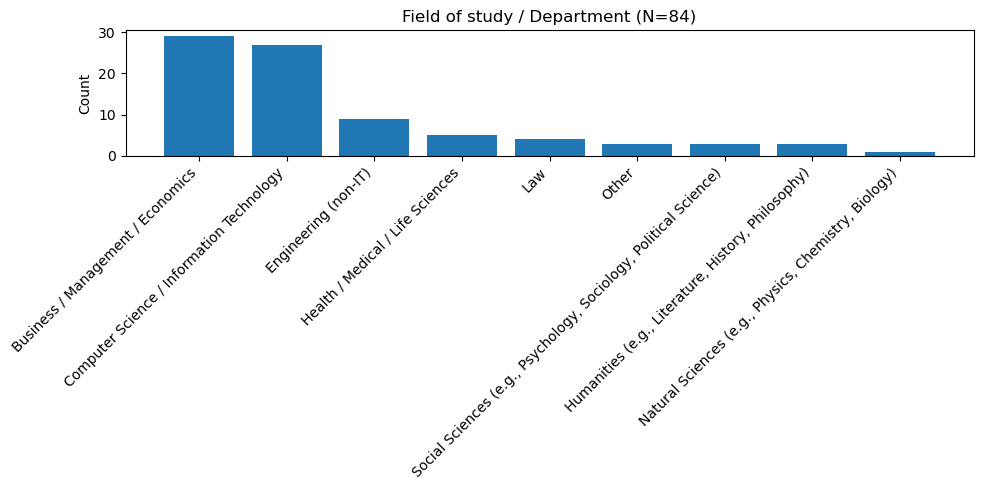

In [14]:
t_level = show_profile(df, 'level', 'Level of study (Current/Most recent)')
t_field = show_profile(df, 'field', 'Field of study / Department', rotation=45)

## Experience and AI-related background

,Category,n,%
0,No,23,27.4
1,"Yes, full-time work",19,22.6
2,"Yes, an internship only",17,20.2
3,"Yes, part-time work",14,16.7
4,"Yes, both internship and (part-time/full-time) work",11,13.1


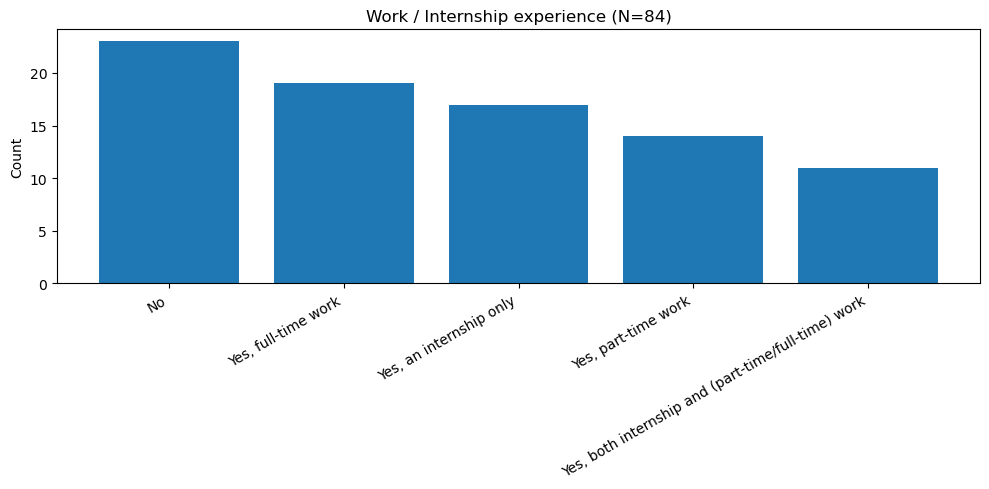

,Category,n,%
0,Yes,60,71.4
1,Maybe,17,20.2
2,No,7,8.3


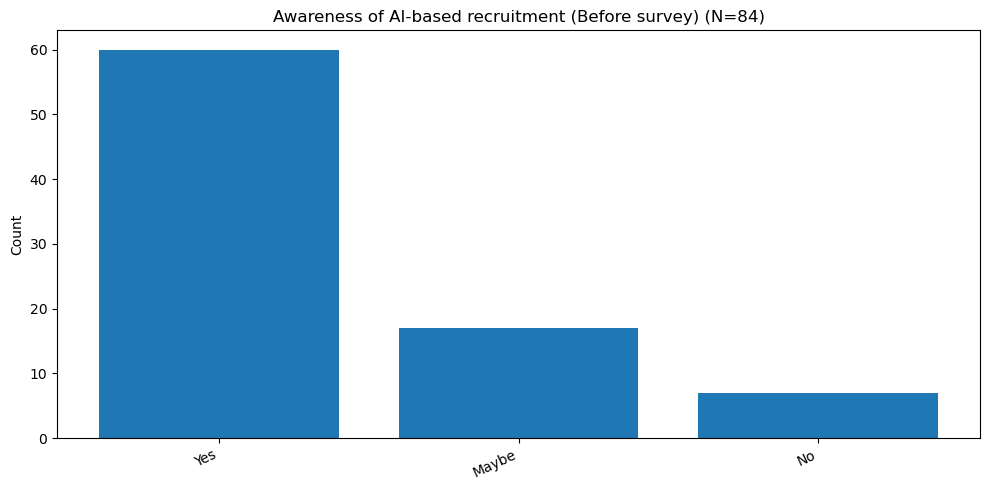

,Category,n,%
0,No,33,39.3
1,Yes,28,33.3
2,Maybe,23,27.4


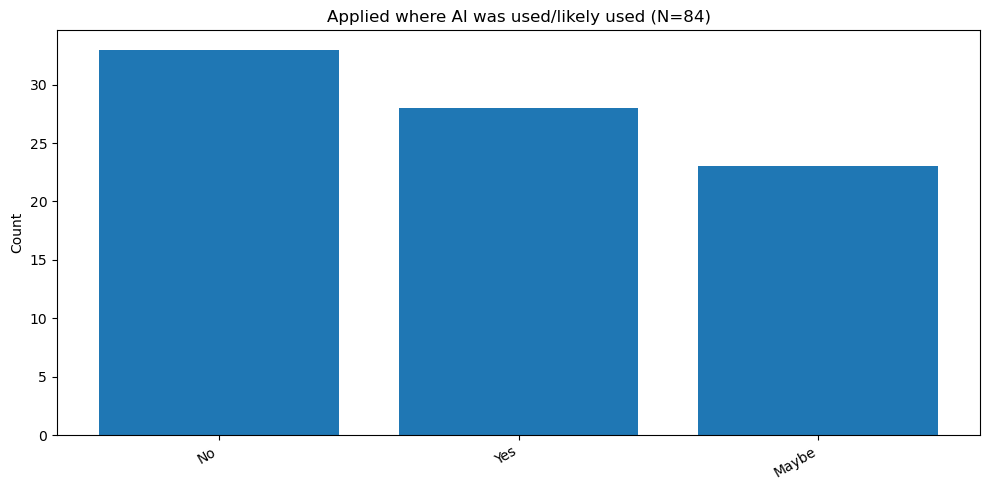

In [15]:
t_workexp = show_profile(df, 'workexp', 'Work / Internship experience')
t_aware = show_profile(df, 'aware', 'Awareness of AI-based recruitment (Before survey)', rotation=25)
t_applied = show_profile(df, 'applied_ai', 'Applied where AI was used/likely used')